<a href="https://colab.research.google.com/github/cja2156/USD-MS-AAI/blob/main/ChrisAlleyne_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Visualize MNIST, build and train CNN, plot learning curve.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


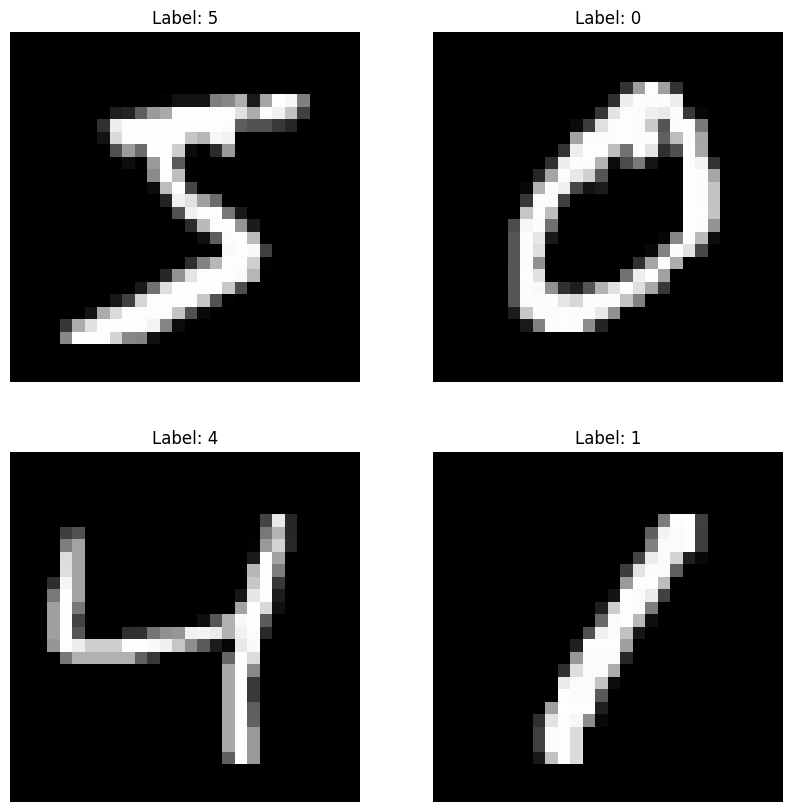

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot the first 4 images
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 117s 304ms/step - accuracy: 0.8778 - loss: 0.4084 - val_accuracy: 0.9845 - val_loss: 0.0528
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 113s 300ms/step - accuracy: 0.9865 - loss: 0.0455 - val_accuracy: 0.9866 - val_loss: 0.0424
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 113s 301ms/step - accuracy: 0.9911 - loss: 0.0266 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 144s 307ms/step - accuracy: 0.9922 - loss: 0.0225 - val_accuracy: 0.9873 - val_loss: 0.0434
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 300ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9904 - val_loss: 0.0358
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 301ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9910 - val_loss: 0.0332
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 299ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9901 - val_loss: 0.0367
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 146s 310ms/step - accuracy: 0.9972 -

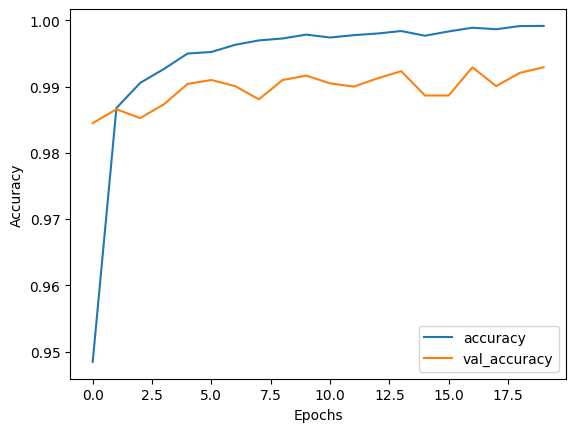

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Preprocess data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Part 2: Visualize CIFAR-10, apply augmentations, design a CNN, improve it, and compare pre-trained models

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


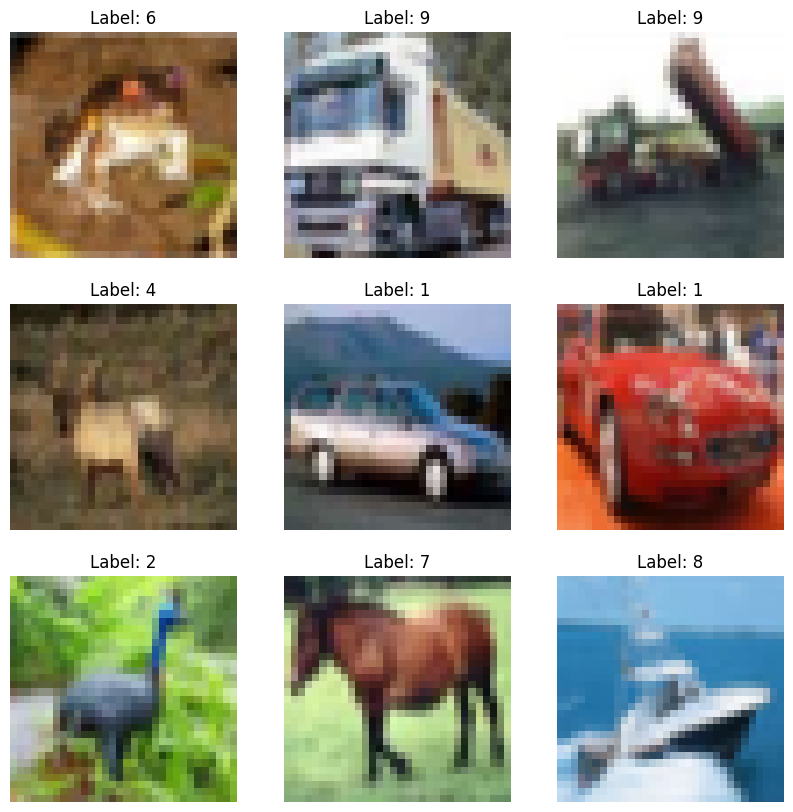

In [3]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Plot first 9 images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i][0]}")
    plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 506ms/step - accuracy: 0.2047 - loss: 2.1380 - val_accuracy: 0.4302 - val_loss: 1.6394
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 507ms/step - accuracy: 0.4302 - loss: 1.5918 - val_accuracy: 0.4893 - val_loss: 1.4298
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 512ms/step - accuracy: 0.4973 - loss: 1.4116 - val_accuracy: 0.5260 - val_loss: 1.3256
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 506ms/step - accuracy: 0.5353 - loss: 1.3123 - val_accuracy: 0.5652 - val_loss: 1.2202
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 502ms/step - accuracy: 0.5671 - loss: 1.2253 - val_accuracy: 0.5882 - val_loss: 1.1613
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 197s 501ms/step - accuracy: 0.5952 - loss: 1.1495 - val_accuracy: 0.6166 - val_loss: 1.0947
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 505ms/step - accuracy: 0.6189 - loss: 1.0799 - val_accuracy: 0.6214 - val_loss: 1.0893
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 506ms/step - accuracy: 0.6393 - loss: 1.03

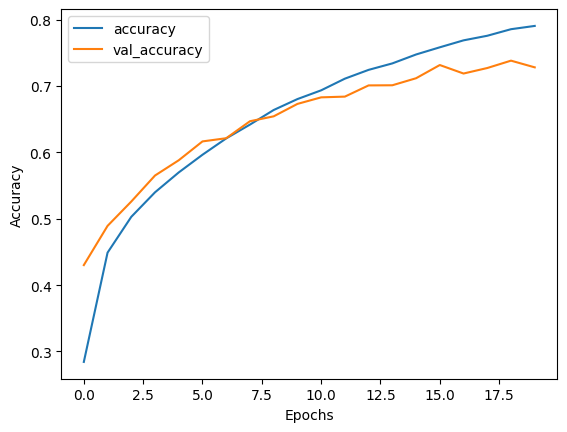

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augment the data
datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(train_images)

# Define a similar CNN with an extra Dense layer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile with SGD optimizer
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=128),
                    epochs=20,
                    validation_data=(test_images/255.0, test_labels))

# Plot learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model

# Load pre-trained models
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom top layers for CIFAR-10
# ... (Add Flatten, Dense layers, and compile the models)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - accuracy: 0.3003 - loss: 1.9528 - val_accuracy: 0.4807 - val_loss: 1.5008
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.4614 - loss: 1.5341 - val_accuracy: 0.4979 - val_loss: 1.4186
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 783s 2s/step - accuracy: 0.4964 - loss: 1.4358 - val_accuracy: 0.5307 - val_loss: 1.3494
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.5163 - loss: 1.3751 - val_accuracy: 0.5420 - val_loss: 1.3119
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.5309 - loss: 1.3374 - val_accuracy: 0.5493 - val_loss: 1.2894
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.5367 - loss: 1.3233 - val_accuracy: 0.5541 - val_loss: 1.2667
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 783s 2s/step - accuracy: 0.5469 - loss: 1.2940 - val_accuracy: 0.5554 - val_loss: 1.2593
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.5566 - loss: 1.2708 - val_accu

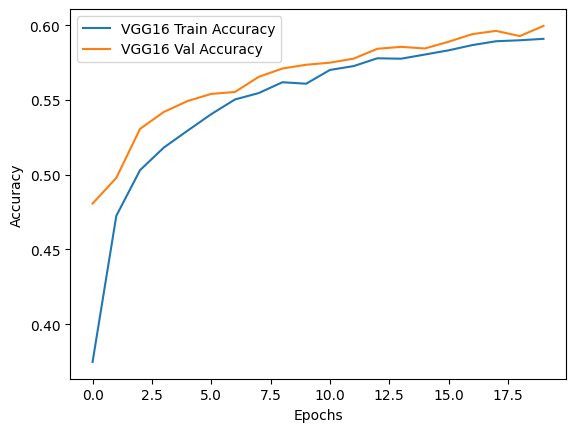

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

# Load VGG16 without the top layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
vgg_base.trainable = False

# Add custom layers on top of VGG16
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
vgg_history = vgg_model.fit(train_images / 255.0, train_labels, epochs=20, batch_size=128,
                            validation_data=(test_images / 255.0, test_labels))

# Plot learning curves
plt.plot(vgg_history.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 616ms/step - accuracy: 0.1005 - loss: 2.4257 - val_accuracy: 0.0999 - val_loss: 2.3026
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 259s 608ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 606ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 261s 603ms/step - accuracy: 0.0988 - loss: 2.3027 - val_accuracy: 0.0999 - val_loss: 2.3026
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 264s 609ms/step - accuracy: 0.1007 - loss: 2.3021 - val_accuracy: 0.1039 - val_loss: 2.2896
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 256s 595ms/step - accuracy: 0.1082 - loss: 2.2938 - val_accuracy: 0.1361 - val_loss: 2.2789
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 266s 604ms/step - accuracy: 0.1225 - loss: 2.2830 - val_accuracy: 0.1741 - val_loss: 2.2476
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 608ms/step - accuracy: 0.1261 -

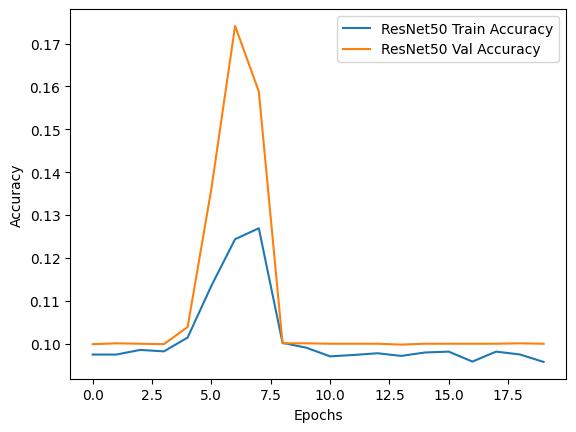

In [7]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 without the top layer
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional base
resnet_base.trainable = False

# Add custom layers on top of ResNet50
resnet_model = Sequential([
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
resnet_model.compile(optimizer=SGD(learning_rate=0.005, decay=1e-6, momentum=0.9, nesterov=True),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
resnet_history = resnet_model.fit(train_images / 255.0, train_labels, epochs=20, batch_size=128,
                                  validation_data=(test_images / 255.0, test_labels))

# Plot learning curves
plt.plot(resnet_history.history['accuracy'], label='ResNet50 Train Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='ResNet50 Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()